# Homework 5

## FINM 37400 - 2023

### UChicago Financial Mathematics

* Mark Hendricks
* hendricks@uchicago.edu

# 1. Forward Rates

Use the data set `treasury_zero_coupon_2022-12-30.xlsx`.

It gives prices on **zero coupon bonds** with maturities of 1 through 5 years.
* These are prices per \\$1 face value on bonds that only pay principal.
* Such bonds can be created from treasuries by *stripping* out their coupons.
* In essence, you can consider these prices as the discount factors $Z$, for maturity intervals 1 through 5 years.

In this problem, we focus on six dates: the month of December in 2017 through 2022.

In [27]:
import pandas as pd
import numpy as np
import datetime
import warnings
from sklearn.linear_model import LinearRegression
from scipy.optimize import minimize
from scipy import interpolate
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay
import holidays

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,6)
plt.rcParams['font.size'] = 15
plt.rcParams['legend.fontsize'] = 13

from matplotlib.ticker import (MultipleLocator,
                               FormatStrFormatter,
                               AutoMinorLocator)
import sys
import treasury_cmds

In [68]:
treasury_zero_coupon = pd.read_excel('C:/Users/dcste/OneDrive/fixed_income/fixed_income_FORKED/finm-fixedincome-2023/data/treasury_zero_coupon_2022-12-30.xlsx')

In [69]:
treasury_zero_coupon = treasury_zero_coupon.set_index('date')
dates_ = ['2017-12-29','2018-12-31','2019-12-31','2020-12-31','2021-12-31','2022-12-30']

In [74]:
selected_treasury_dates = treasury_zero_coupon.loc[dates_,:]

In [76]:
selected_treasury_dates

,1,2,3,4,5
date,,,,,
2017-12-29,0.982422,0.963139,0.942395,0.918869,0.895638
2018-12-31,0.974310,0.951959,0.929327,0.905801,0.882568
2019-12-31,0.984394,0.968938,0.952964,0.935710,0.918910
2020-12-31,0.998959,0.997520,0.995299,0.989455,0.981537
2021-12-31,0.996173,0.985500,0.971251,0.954872,0.938668
2022-12-30,0.954636,0.916229,0.883347,0.851046,0.820298


In [81]:
# (1.1)
def forward_discount_factor(df):
    F_discount_factors = pd.DataFrame(columns=df.columns)
    col = df.columns
    for i in range(len(df.columns)-1):
        F_discount_factors[col[i+1]] = df[col[i+1]].divide(df[col[i]])

    F_curve = pd.DataFrame(F_discount_factors)
    return F_curve

In [ ]:
# (1.2)
def forward_rates(F_discount_factor_curve_df, time_delta):
    f_rates = pd.DataFrame(columns = F_discount_factor_curve_df.columns)
    f_rates = -np.log(F_discount_factor_curve_df.astype('float64'))/time_delta
    return f_rates

In [82]:
discount_factors = forward_discount_factor(selected_treasury_dates)

In [83]:
discount_factors

,1,2,3,4,5
date,,,,,
2017-12-29,NaN,0.980372,0.978461,0.975036,0.974718
2018-12-31,NaN,0.977060,0.976226,0.974684,0.974351
2019-12-31,NaN,0.984299,0.983514,0.981894,0.982046
2020-12-31,NaN,0.998560,0.997773,0.994129,0.991997
2021-12-31,NaN,0.989286,0.985541,0.983136,0.983031
2022-12-30,NaN,0.959768,0.964111,0.963434,0.963870


## 1.1

For each of the six dates, (Dec 2017, Dec 2018, ...), calculate the forward discount factor, $F(t,T_1,T_2)$, where $T_2 = T_1 + 1$ for $1\le T_1\le 4$.

Make a plot of the curve $F$ at each of these six dates.

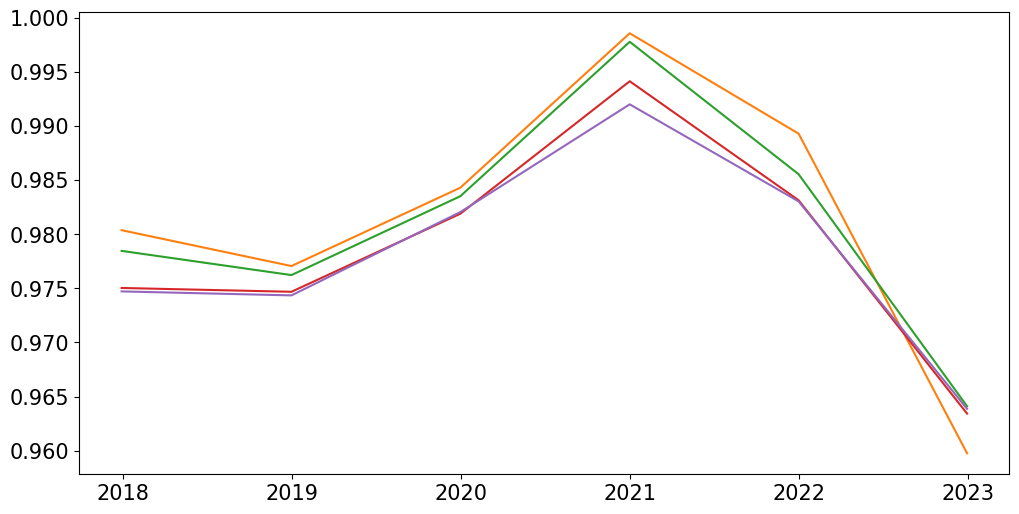

In [84]:
plt.plot(discount_factors)

## 1.2



Use $F$ above to calculate the continuously compounded forward rates, $f$, at the six dates.

Make a plot of the curve, $f$, at each of these six dates.

## 1.3

Calculate the continuously compounded spot rates, $r$, at the six dates.

Plot both the forward curve and the spot curve on the date of Dec 2017.

Recall that $f(t,t,t+1) = r(t,t+1)$.

## 1.4

Plot the forward curve on Dec 2017 against the time-series evolution of $r(t,t+1)$ for dates $t$ between Dec 2017 and Dec 2021.

How does the evolution of one-year rates between 2017-2021 compare to the forward rates of 2017?

# 2. Carry Trade

## 2.1

Suppose it is December 2017, and you determine to implement a carry trade with the following specification...

* Long \\$100 million of the 5-year zero-coupon bond (maturing Dec 2022.)
* Short \\$100 million of the 1-year zero-coupon bond (maturing Dec 2018.)
* Assume there is a 2% haircut on each side of the trade, so it requires \\$4 million of investor capital to initiate it.

Trace the profit and loss each year.
* Note that each year you will roll over the short position until the trade concludes in Dec 2022.

Calculate the total profit and loss when the trade concludes in Dec 2022.
* Calculate the total return on the initial \\$4 million of investor capital.

## 2.2

How would this trade play out if the path of one-year spot rates equaled the forward rates observed in 2017?

## 2.3

Given Fact 3 of the *dynamic* (conditional) tests of EH in notebook W.5., do you expect that as of Dec 2022 the long-short trade above looks more or less favorable as of Dec 2022-2027 than it did as of Dec 2017-2022?